<a name="1"></a>
# Sequence Storage in Tournament-Based Structures
This code simulates the proposed sequence storage models and retrieval algorithms that introduced in the paper below that is submitted to the [Neural Computation](https://www.mitpressjournals.org/loi/neco):

**Mofrad, A. A., Mofrad, S. A. Yazidi, A., & Parker, M. G.  (2021). On Neural Associative Memory Structures: Storage and Retrieval of Sequences in a Chain of  Tournaments .**

The structures are based on the original work by [Jiang et. al (2016)](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=7114322) that deals with the problem of storing then retrieving sequences in sparse binary neural networks.

<a name="1"></a>
## Part 1:  Import libraries and classes and initializations

- Let's import libraries and the classes and do initializations

In [1]:
import numpy as np
import pickle
import time

import Tournament_basis as Tour

!git clone https://github.com/Asieh-A-Mofrad/Tournament-Based-Sequence-Storage.git

import sys
Path = '/content/Tournament-Based-Sequence-Storage/'
sys.path.insert(0, Path)

### Configuration of Initial values
- `c`: is the number of clusters in the model
- `k`: is the required bits to represent a sub-sequence (component). The number of (nodes) neurons in a cluster equals l=2<sup>k</sup>.
- `L`: the length of sequence (number of components)
- `r`: forward output edges from each active neuron.
- `r_fdbk`: the size of backward edges from each active neuron. Applicable in `Tournament_Feedback_Winner` and `Tournament_Backward_Winner`. 
- `r_explore`: The number of clusters which is used for exploration.  Applicable in `Tournament_Explore_Winner`. `r_explore` must be less than `r-1`.
- `Num_Seq`: is a list of integers as the size of learning set in simulations.
- `Iter`: The number of repetition of retrieval (the error is an average over errors in retrieving `Iter` randomly selected sequences from the learning set)

In [2]:
def Simulation_parameters(structure_ID):
    """
    Here the information for the simulation will be provided. 
    """
    memory_type = {1 : 'Tournament_Winner', 
                   2 : 'Tournament_Cache_Winner',
                   3 : 'Tournament_Explore_Winner',
                   4 : 'Tournament_Feedback_Winner',
                   5 : 'Tournament_Backward_Winner'
        }
    Initial_values = { 
            1: {
                ### Change the Parameters with your values ###
                'memory_type' : memory_type[structure_ID], 
                'c' : 20,
                'k' : 8,
                'L' : 100,
                'r' : 12, # total. The size of tournament is r + 1
                'r_fdbk' : 6, # c >= 2*r - r_fdbk +1
                'r_explore' : 7, # r_explore < r-1
                'Num_Seq': np.linspace(10, 15000, 20, dtype = int),
                'Iter' : 50
                    },
            ### You can add new items with an integer ('result_no') as the key ###  
            }
    return Initial_values


<a name="1"></a>
## Part 2:  Choose the structure

- `result_no`  is used to assign a set of parameters initial values in `initialization.py`  and is used for saving the output

- `structure_ID` is a number between 1-5 that determines the memory and retrieval setting  

- The results will be saved in a pickle file in the "results" folder.

- Results of a previously simulated data can be accessed by its filename.

- `Learning_set_flag` must be set `True` in the case that there is no Learning set for the chosen initial values, or one want to generate a new learning set. Otherwise, it is `False`.
To see the results for a previous simulation, change `file_name= None` to a file name in the results folder, say `file_name = 'results/Tournament_Winner_2_100.p'` 

In [2]:
# You can change the valuses in this cell
result_no = 1 # currently it is the only valid 'key'. 
structure_ID = 5  # Change the ID to choose a different structure. Options are 1, 2, 3, 4 and 5
file_name = None  # Give the file_name to just plot a previousely saved simulation
Learning_set_flag = True # change it to False if the learning set is generated in a previous run

#file_name = Path + 'results/Tournament_Winner_2_100.p'

<a name="1"></a>
## Part 3: Run the main code
Now run the below cell to see the results.

Learning set generated for; Size = 10
Learning set generated for; Size = 798
Learning set generated for; Size = 1587
Learning set generated for; Size = 2376
Learning set generated for; Size = 3165
Learning set generated for; Size = 3954
Learning set generated for; Size = 4743
Learning set generated for; Size = 5532
Learning set generated for; Size = 6321
Learning set generated for; Size = 7110
Learning set generated for; Size = 7899
Learning set generated for; Size = 8688
Learning set generated for; Size = 9477
Learning set generated for; Size = 10266
Learning set generated for; Size = 11055
Learning set generated for; Size = 11844
Learning set generated for; Size = 12633
Learning set generated for; Size = 13422
Learning set generated for; Size = 14211
Learning set generated for; Size = 15000
------------
 Retrieval in process for Learning set Size = 10 

------------
 Retrieval in process for Learning set Size = 798 

------------
 Retrieval in process for Learning set Size = 1587 

-

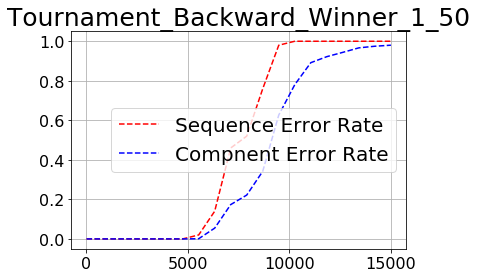


 **SER results** 

{10: 0.0, 798: 0.0, 1587: 0.0, 2376: 0.0, 3165: 0.0, 3954: 0.0, 4743: 0.0, 5532: 0.02, 6321: 0.14, 7110: 0.46, 7899: 0.52, 8688: 0.76, 9477: 0.98, 10266: 1.0, 11055: 1.0, 11844: 1.0, 12633: 1.0, 13422: 1.0, 14211: 1.0, 15000: 1.0}

 **CER results** 

{10: 0.0, 798: 0.0, 1587: 0.0, 2376: 0.0, 3165: 0.0, 3954: 0.0, 4743: 0.0, 5532: 0.0009090909090909091, 6321: 0.05454545454545454, 7110: 0.17363636363636364, 7899: 0.22181818181818183, 8688: 0.3422727272727273, 9477: 0.6268181818181818, 10266: 0.7804545454545454, 11055: 0.8915909090909091, 11844: 0.9220454545454545, 12633: 0.9438636363636363, 13422: 0.9665909090909091, 14211: 0.9747727272727272, 15000: 0.98}

------ **HERE is a record on the decision type when the candidate is not unique**-------

random {10: 0.0, 798: 0.0, 1587: 0.0, 2376: 0.0, 3165: 0.0, 3954: 0.02, 4743: 0.0, 5532: 0.06, 6321: 1.36, 7110: 4.74, 7899: 5.96, 8688: 11.28, 9477: 21.2, 10266: 30.18, 11055: 38.22, 11844: 42.46, 12633: 49.42, 13422: 53.36, 

In [3]:
# Don't Change this cell. 
%matplotlib inline 

def Initialization(result_no, structure_ID):
    Initial_values = Simulation_parameters(structure_ID)
    return Initial_values[result_no]

if file_name == None:
    parameter = Initialization(result_no, structure_ID)
    general_memory = Tour.Tournumant(parameter)
    Memory = general_memory.tournament
    if Learning_set_flag: 
        Learning_set = Memory.Learning_Set_Generator()
        pickle.dump(Learning_set, open( f'results/Learning_set_basis_{result_no}.p', "wb" ))
        Testing_index = Memory.Testing_set_Generator()
        pickle.dump(Testing_index, open( f'results/Testing_set_basis_{result_no}.p', "wb" ))

    Start = time.time()
    Memory.Test_Retrieval(result_no)
    Duration = time.time()-Start
    print('\n---------------\n execution time', Duration)

    file_name = f'results/{parameter["memory_type"]}_{result_no}_{parameter["Iter"]}.p'
    print('results are saved in', file_name)

Tour.Plot_Results(file_name).Plot_Error()

## License

MIT license (MIT-LICENSE or http://opensource.org/licenses/MIT)